<a href="https://colab.research.google.com/github/nistrate/tensorflow_notes/blob/master/Code_Prep_Regression_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Theory

- recap the steps
1) load in the data ($X$ and $Y$) - may involve transforming data
2) instantiate the model
3) train ("fit") the model
4) evaluate the model

LRT
 - 1 input
 $$
 \hat{y} = m x +b ~~~ {\text{ or }} ~~~(ax+b)
 $$

 - multiple inputs
$$
\hat{y} = \sum_{d=1}^{D} w_{d}x_{d} +b  = w^{T}x + b
$$

Stochastic Gradient Descent


```
model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9) , loss= 'mse')
```
The optimizer is not ```adam``` but ```SGD``` which stands for Stochastic Gradient Descent

Learning Rate Scheuling
- modify your learning rate based on the epoch number

For the ```loss``` we chose here is the mean square error ```mse```
$$
MSE = \frac{1}{N}\sum_{i=1}^{N} (y_{i} - \hat{y}_i)^2
$$




EXPONENTIAL GROWTH

$$
C = A_{0}r^t
$$

- $C$ - count (output variable)
- $A_0$ - initial value of $C$ at $t= 0$
- t - time (input variable, year in our case)
- r - rate of growth

Notice that this is not a linear problem.

We can make it linear if we take the $\log$ of the equation above

$$
\log [C] = \log [r]t + \log [A_0]  
$$


Veryfying Moore's Law

In [1]:
#!pip install -q tensorflow = 2.0.0
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-07-08 18:34:48--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-07-08 18:34:48 (46.0 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0].reshape(-1,1) # make it a 2D array of size N x D where D = 1
Y = data[:,1]

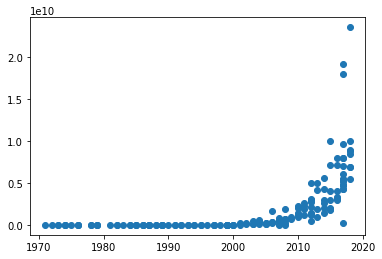

In [10]:
plt.scatter(X,Y) #notice the exponenetial trend of the data

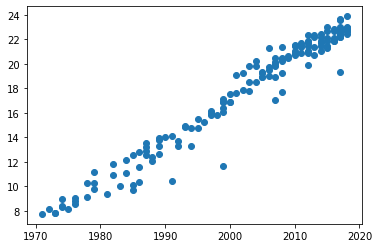

In [12]:
Y = np.log(Y)
plt.scatter(X,Y)

In [ ]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverese the transformation later

X = X - X.mean()


In [16]:
# Now let's create the tensorflow model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile (optimizer= tf.keras.optimizers.SGD(0.001, 0.9), loss= 'mse')
#model.compile(optimizer = 'adam', loss = 'mse')

#learning rate scheduler

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the network

r = model.fit(X,Y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 493.5688 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 452.6437 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 333.0212 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 207.7087 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 164.7628 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 150.9201 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 106.6861 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 72.2851 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 50.2044 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 43.0104 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

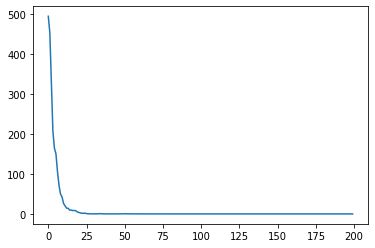

In [17]:
plt.plot(r.history['loss'], label = 'loss')

In [18]:
#get the slope of the line
# The slope of the line is related to the doubling rate of the transistor count

print(model.layers) # Note: there's only 1 layer, the input layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3461345]], dtype=float32), array([17.77229], dtype=float32)]


In [20]:
# The slope of the line is

a = model.layers[0].get_weights()[0][0,0]

The poriginal exponential gowth:

$$
C = A_0 r^t
$$

linearize
$$
\log [C] = \log[r]t + \log[A_0]
$$